# Show SED using  PySynPhot
=========================================================================


The purpose is to start to use PySynPhot software to calculate things on
SED

- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- creation date October 30th 2017


In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
import re

In [3]:
import astropy.units as u

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
os.environ['PYSYN_CDBS']

'/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs'

In [6]:
import pysynphot as S
from astropy.io import ascii

# Defining CTIO 0.9m telescope

In [7]:
CTIO_COLL_SURF=0.9*(u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [8]:
CTIO_COLL_SURF.decompose()

<Quantity 9000.0>

In [9]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 45238.93416


In [10]:
S.refs.setref(area=CTIO_COLL_SURF.decompose(), waveset=None)

In [11]:
S.refs.set_default_waveset(minwave=3000, maxwave=11000, num=8000, delta=10, log=False)

In [12]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 3000, Max: 11000, Num: None, Delta: 10, Log: False
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 9000.0


In [13]:
plt.ion()
plt.clf()

# Spectra

In [14]:
calspec_sed={'HD111980':'hd111980_stis_003.fits',\
             'HD205905':'hd205905_stis_003.fits',\
             'HD185975':'hd185975_stis_003.fits'}       

In [25]:
all_sed = []
all_names = []
for obj in calspec_sed:
    sed_filename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec',calspec_sed[obj])
    all_sed.append(S.FileSpectrum(sed_filename))
    all_names.append(obj)

Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.


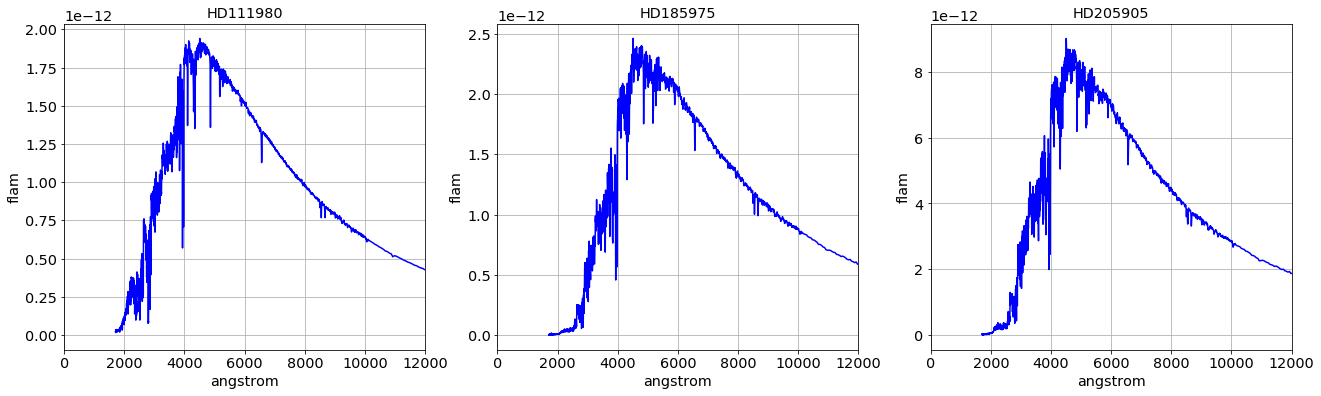

In [26]:
NFIG=3
f, axarr = plt.subplots(1,NFIG,figsize=(22,6))
for idx in np.arange(NFIG):
    sed=all_sed[idx]
    axarr[idx].plot(sed.wave,sed.flux,'b-')
    axarr[idx].grid()
    axarr[idx].set_xlim(0.,12000)
    axarr[idx].set_xlabel(sed.waveunits)
    axarr[idx].set_ylabel(sed.fluxunits)
    axarr[idx].set_title(all_names[idx])


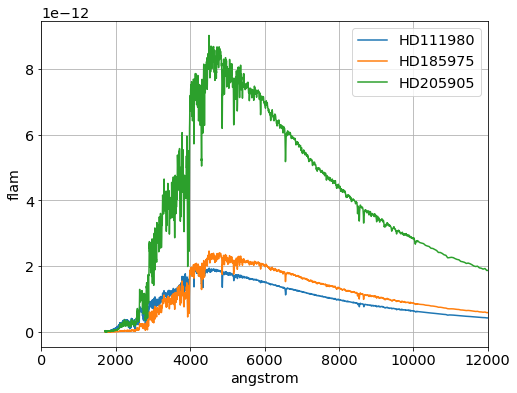

In [34]:
NFIG=3
f, axarr = plt.subplots(1,figsize=(8,6))
idx=0
for ifig in np.arange(NFIG):
    sed=all_sed[ifig]
    thelabel=all_names[ifig]
    axarr.plot(sed.wave,sed.flux,label=thelabel)
    axarr.grid()
    axarr.set_xlim(0.,12000)
    axarr.set_xlabel(sed.waveunits)
    axarr.set_ylabel(sed.fluxunits)
    axarr.legend()
    f.savefig("sed.pdf")